Experiment#1:
this file contain models trained on the RAZRIV column. it is a binary column and contains the number of cases that contain Myocardial rupture.


1. First Discuss the dataset biasness towards the class 0.
2. write about the algorithms used and their results.
3. Discuss the technique applied on  these modeels.

We applied DNN, RNN, CNN and LSTM models on this dataset with results of 99.39, 99.24, 99.54 and 99.24 respectively. Firstly the models were trained on unbalanced datasets and then on the balanced one. Their results were 96.76 on all the listed 4 models DNN, RNN, CNN and LSTM.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)
#GENERAL
import pandas as pd
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow.keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist
import keras
#SKLEARN CLASSIFIER
# from xgboost import XGBClassifier, XGBRegressor
# from lightgbm import LGBMClassifier, LGBMRegressor
# from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
#from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)
#GENERAL
import pandas as pd
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow.keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist
import keras
#SKLEARN CLASSIFIER
# from xgboost import XGBClassifier, XGBRegressor
# from lightgbm import LGBMClassifier, LGBMRegressor
# from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
#from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
# from keras.optimizers import Adam,Optimizer,Optimizer, SGD
from tensorflow.keras.optimizers import Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy

In [3]:
column_labels = ['ID', 'Age', 'Sex', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A',  'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12','fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']

num_values = len(column_labels)
num_values

124

In [4]:
# Read the data
dataset=r"/content/drive/MyDrive/dataaa/MI.data"
df = pd.read_csv(dataset, na_values='?')

# Assign column labels
df.columns = column_labels


In [ ]:
df

,ID,Age,Sex,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,6,64.0,1,0.0,1.0,2.0,1.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1695,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1696,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1697,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
df.nunique()

ID           1699
Age            62
Sex             2
INF_ANAM        4
STENOK_AN       7
             ... 
DRESSLER        2
ZSN             2
REC_IM          2
P_IM_STEN       2
LET_IS          8
Length: 124, dtype: int64

In [5]:
df = df.fillna(0)

0    1645
1      54
Name: RAZRIV, dtype: int64

Ratio of the case 0 84.05%

Ratio of the case 1 6.47%


<Axes: xlabel='RAZRIV', ylabel='count'>

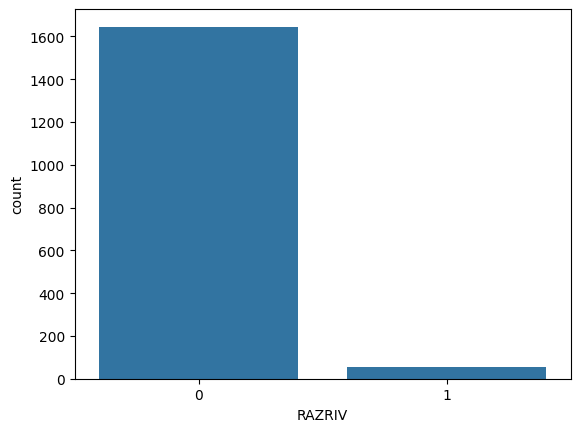

In [6]:
import seaborn as sb

print(df['RAZRIV'].value_counts())

a = (df['LET_IS'].value_counts()[0] / len(df['RAZRIV'])) * 100
b = (df['LET_IS'].value_counts()[1] / len(df['RAZRIV'])) * 100


print('\nRatio of the case 0 %.2f%%' % a)
print('\nRatio of the case 1 %.2f%%' % b)



sb.countplot(x=df['RAZRIV'])

#On Unbalanced Dataset

In [7]:
X = df.drop(['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'], axis=1).reset_index(drop=True)
y = df['RAZRIV'].reset_index(drop=True)

#RNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data for the RNN model
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(1, 112)))
model.add(Dropout(0.2))  # Add dropout with a suitable rate
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
batch_size = 32
epochs = 10
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])
# Train the model
#model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/10
43/43 [==============================] - 3s 19ms/step - loss: 0.9732 - accuracy: 0.5460 - val_loss: 0.4681 - val_accuracy: 0.8529
Epoch 2/10
43/43 [==============================] - 0s 6ms/step - loss: 0.3113 - accuracy: 0.9227 - val_loss: 0.2273 - val_accuracy: 0.9529
Epoch 3/10
43/43 [==============================] - 0s 5ms/step - loss: 0.1839 - accuracy: 0.9566 - val_loss: 0.1731 - val_accuracy: 0.9618
Epoch 4/10
43/43 [==============================] - 0s 7ms/step - loss: 0.1483 - accuracy: 0.9654 - val_loss: 0.1515 - val_accuracy: 0.9647
Epoch 5/10
43/43 [==============================] - 0s 6ms/step - loss: 0.1275 - accuracy: 0.9676 - val_loss: 0.1399 - val_accuracy: 0.9647
Epoch 6/10
43/43 [==============================] - 0s 6ms/step - loss: 0.1136 - accuracy: 0.9684 - val_loss: 0.1288 - val_accuracy: 0.9647
Epoch 7/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.9713 - val_loss: 0.1217 - val_accuracy: 0.9676
Epoch 8/10
43/43 [=

11/11 [==============================] - 0s 2ms/step


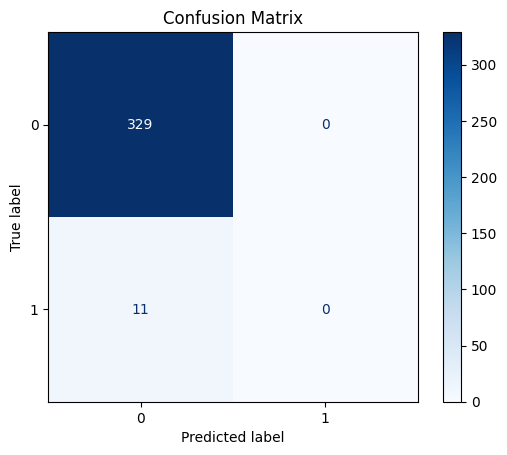

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       329
           1       0.00      0.00      0.00        11

    accuracy                           0.97       340
   macro avg       0.48      0.50      0.49       340
weighted avg       0.94      0.97      0.95       340



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Display classification report
print("Classification Report:")
print(class_report)


11/11 [==============================] - 0s 2ms/step


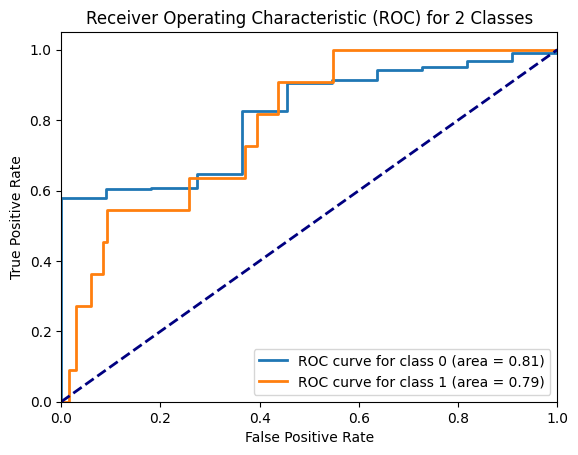

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area for each class
plt.figure()
for i in range(2):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class {} (area = {:.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for 2 Classes')
plt.legend(loc='lower right')
plt.show()


#DNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the DNN model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=112))
model.add(Dropout(0.5))  # Add dropout with a suitable rate
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Add dropout with a suitable rate
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Add dropout with a suitable rate
model.add(Dense(2, activation='sigmoid'))  # Assuming 8 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/10
43/43 [==============================] - 3s 24ms/step - loss: 0.3402 - accuracy: 0.8793 - val_loss: 0.1735 - val_accuracy: 0.9676
Epoch 2/10
43/43 [==============================] - 0s 8ms/step - loss: 0.1965 - accuracy: 0.9669 - val_loss: 0.1339 - val_accuracy: 0.9676
Epoch 3/10
43/43 [==============================] - 1s 15ms/step - loss: 0.1700 - accuracy: 0.9654 - val_loss: 0.1220 - val_accuracy: 0.9676
Epoch 4/10
43/43 [==============================] - 0s 6ms/step - loss: 0.1482 - accuracy: 0.9669 - val_loss: 0.1113 - val_accuracy: 0.9676
Epoch 5/10
43/43 [==============================] - 0s 7ms/step - loss: 0.1315 - accuracy: 0.9684 - val_loss: 0.1041 - val_accuracy: 0.9676
Epoch 6/10
43/43 [==============================] - 0s 6ms/step - loss: 0.1283 - accuracy: 0.9691 - val_loss: 0.0951 - val_accuracy: 0.9676
Epoch 7/10
43/43 [==============================] - 0s 7ms/step - loss: 0.1203 - accuracy: 0.9669 - val_loss: 0.0938 - val_accuracy: 0.9676
Epoch 8/10
43/43 [

11/11 [==============================] - 0s 2ms/step


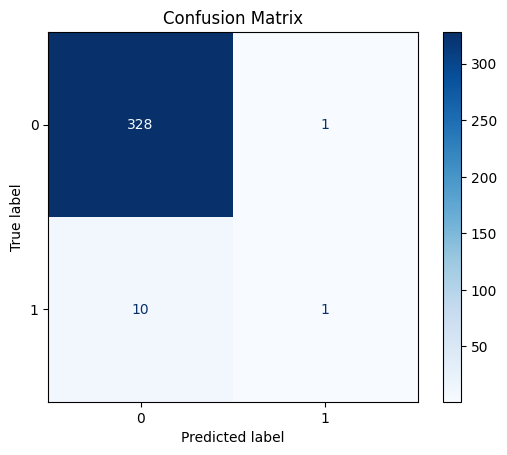

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       329
           1       0.50      0.09      0.15        11

    accuracy                           0.97       340
   macro avg       0.74      0.54      0.57       340
weighted avg       0.96      0.97      0.96       340



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Display classification report
print("Classification Report:")
print(class_report)


11/11 [==============================] - 0s 2ms/step


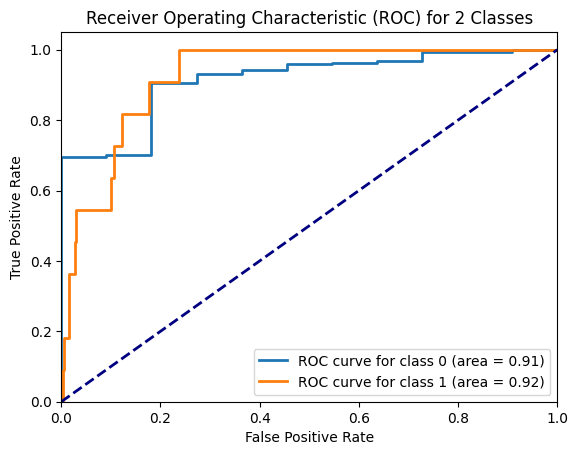

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area for each class
plt.figure()
for i in range(2):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class {} (area = {:.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for 2 Classes')
plt.legend(loc='lower right')
plt.show()


#CNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data for the CNN model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout with a suitable rate
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/10
43/43 [==============================] - 3s 28ms/step - loss: 0.2025 - accuracy: 0.9654 - val_loss: 0.1517 - val_accuracy: 0.9676
Epoch 2/10
43/43 [==============================] - 1s 19ms/step - loss: 0.1398 - accuracy: 0.9684 - val_loss: 0.1188 - val_accuracy: 0.9676
Epoch 3/10
43/43 [==============================] - 1s 20ms/step - loss: 0.1130 - accuracy: 0.9684 - val_loss: 0.1176 - val_accuracy: 0.9676
Epoch 4/10
43/43 [==============================] - 1s 26ms/step - loss: 0.1066 - accuracy: 0.9684 - val_loss: 0.1146 - val_accuracy: 0.9676
Epoch 5/10
43/43 [==============================] - 1s 18ms/step - loss: 0.1014 - accuracy: 0.9684 - val_loss: 0.1161 - val_accuracy: 0.9676
Epoch 6/10
43/43 [==============================] - 1s 12ms/step - loss: 0.0934 - accuracy: 0.9713 - val_loss: 0.1127 - val_accuracy: 0.9647
Epoch 7/10
43/43 [==============================] - 0s 11ms/step - loss: 0.0860 - accuracy: 0.9728 - val_loss: 0.1051 - val_accuracy: 0.9676
Epoch 8/10
43

11/11 [==============================] - 0s 4ms/step


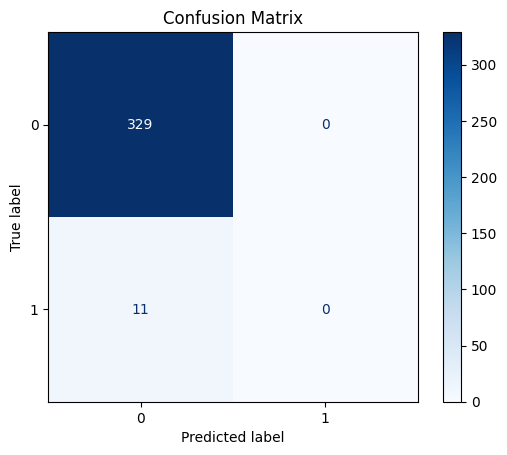

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       329
           1       0.00      0.00      0.00        11

    accuracy                           0.97       340
   macro avg       0.48      0.50      0.49       340
weighted avg       0.94      0.97      0.95       340



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Display classification report
print("Classification Report:")
print(class_report)


11/11 [==============================] - 1s 55ms/step


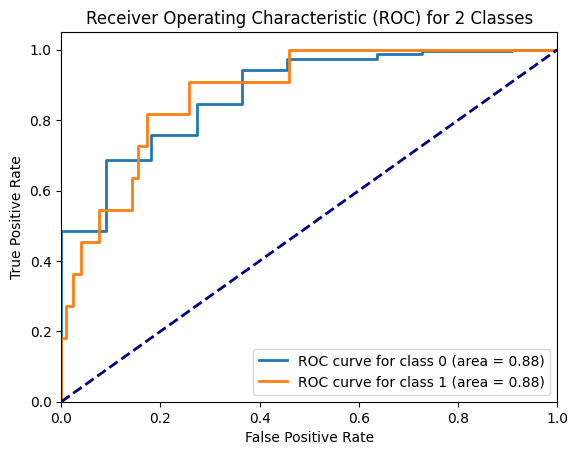

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area for each class
plt.figure()
for i in range(2):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class {} (area = {:.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for 2 Classes')
plt.legend(loc='lower right')
plt.show()


#LSTM

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Assuming you have X and y defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data for the LSTM model
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dropout(0.5))  # Add dropout with a suitable rate
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Add dropout with a suitable rate
model.add(Dense(2, activation='sigmoid'))  # Assuming 8 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/10
43/43 [==============================] - 3s 11ms/step - loss: 0.3750 - accuracy: 0.9014 - val_loss: 0.1379 - val_accuracy: 0.9676
Epoch 2/10
43/43 [==============================] - 0s 4ms/step - loss: 0.1389 - accuracy: 0.9684 - val_loss: 0.1111 - val_accuracy: 0.9676
Epoch 3/10
43/43 [==============================] - 0s 4ms/step - loss: 0.1164 - accuracy: 0.9684 - val_loss: 0.1074 - val_accuracy: 0.9676
Epoch 4/10
43/43 [==============================] - 0s 4ms/step - loss: 0.1005 - accuracy: 0.9684 - val_loss: 0.1069 - val_accuracy: 0.9676
Epoch 5/10
43/43 [==============================] - 0s 4ms/step - loss: 0.0898 - accuracy: 0.9684 - val_loss: 0.1075 - val_accuracy: 0.9676
Epoch 6/10
43/43 [==============================] - 0s 4ms/step - loss: 0.0826 - accuracy: 0.9684 - val_loss: 0.1024 - val_accuracy: 0.9676
Epoch 7/10
43/43 [==============================] - 0s 4ms/step - loss: 0.0701 - accuracy: 0.9684 - val_loss: 0.1057 - val_accuracy: 0.9676
Epoch 8/10
43/43 [=

11/11 [==============================] - 0s 4ms/step


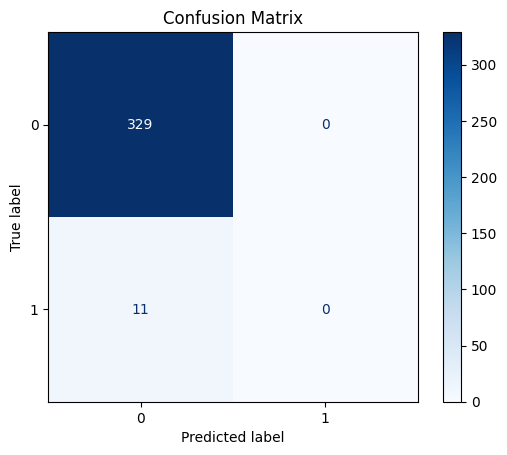

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       329
           1       0.00      0.00      0.00        11

    accuracy                           0.97       340
   macro avg       0.48      0.50      0.49       340
weighted avg       0.94      0.97      0.95       340



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Display classification report
print("Classification Report:")
print(class_report)


11/11 [==============================] - 0s 2ms/step


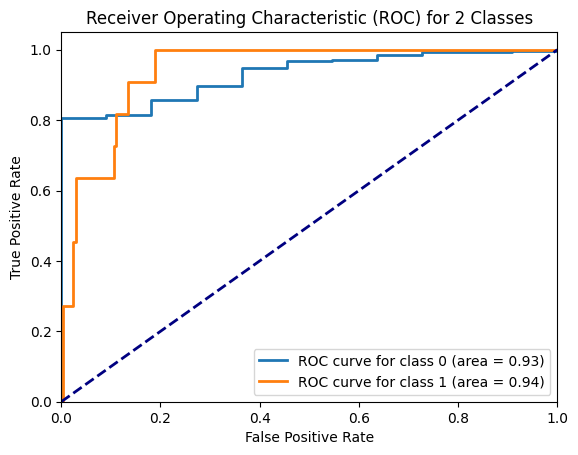

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area for each class
plt.figure()
for i in range(2):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class {} (area = {:.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for 2 Classes')
plt.legend(loc='lower right')
plt.show()


#On Balanced Dataset

In [8]:
X = df.drop(['RAZRIV'], axis=1).reset_index(drop=True)
y = df['RAZRIV'].reset_index(drop=True)

#smote

In [9]:
from imblearn.over_sampling import SMOTE
# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the entire dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Concatenate the resampled data back into a DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='RAZRIV')], axis=1)


0    1645
1    1645
Name: RAZRIV, dtype: int64

Ratio of the case 0 50.00%

Ratio of the case 1 50.00%


<Axes: xlabel='RAZRIV', ylabel='count'>

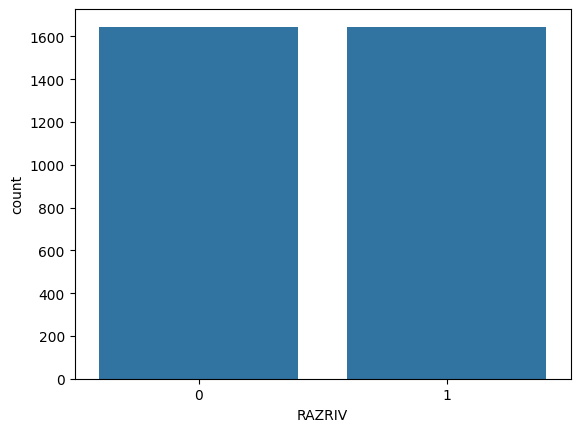

In [10]:
print(df_resampled['RAZRIV'].value_counts())

a = (df_resampled['RAZRIV'].value_counts()[0] / len(df_resampled['RAZRIV'])) * 100
b = (df_resampled['RAZRIV'].value_counts()[1] / len(df_resampled['RAZRIV'])) * 100

print('\nRatio of the case 0 %.2f%%' % a)
print('\nRatio of the case 1 %.2f%%' % b)

sb.countplot(x=df_resampled['RAZRIV'])

In [11]:
X = df_resampled.drop(['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'], axis=1).reset_index(drop=True)
y = df_resampled['RAZRIV'].reset_index(drop=True)

#RNN

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data for the RNN model
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(1, 112)))
model.add(Dropout(0.2))  # Add dropout with a suitable rate
model.add(Dense(2, activation='sigmoid'))  # Assuming 8 classes
# Custom Adaptive Dropout layer
class AdaptiveDropout(tf.keras.layers.Layer):
    def __init__(self, initial_rate=0.2, **kwargs):
        super(AdaptiveDropout, self).__init__(**kwargs)
        self.initial_rate = initial_rate
        self.dropout = None

    def build(self, input_shape):
        self.dropout = tf.keras.layers.Dropout(self.initial_rate)
        super(AdaptiveDropout, self).build(input_shape)

    def call(self, inputs, training=None):
        rate = self.initial_rate if training else 0.0
        return self.dropout(inputs, training=training)

# Implement Adaptive Dropout
model.add(AdaptiveDropout(initial_rate=0.5))
model.add(Dense(2, activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
batch_size = 32
epochs = 30
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])
# Train the model
#model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/30
83/83 [==============================] - 3s 13ms/step - loss: 0.6844 - accuracy: 0.5665 - val_loss: 0.5765 - val_accuracy: 0.8602
Epoch 2/30
83/83 [==============================] - 1s 7ms/step - loss: 0.5749 - accuracy: 0.6292 - val_loss: 0.4990 - val_accuracy: 0.9134
Epoch 3/30
83/83 [==============================] - 1s 7ms/step - loss: 0.5279 - accuracy: 0.6596 - val_loss: 0.4397 - val_accuracy: 0.9468
Epoch 4/30
83/83 [==============================] - 1s 11ms/step - loss: 0.4908 - accuracy: 0.6835 - val_loss: 0.3924 - val_accuracy: 0.9574
Epoch 5/30
83/83 [==============================] - 0s 4ms/step - loss: 0.4616 - accuracy: 0.6957 - val_loss: 0.3558 - val_accuracy: 0.9635
Epoch 6/30
83/83 [==============================] - 0s 4ms/step - loss: 0.4637 - accuracy: 0.6797 - val_loss: 0.3278 - val_accuracy: 0.9681
Epoch 7/30
83/83 [==============================] - 0s 5ms/step - loss: 0.4242 - accuracy: 0.7147 - val_loss: 0.3002 - val_accuracy: 0.9711
Epoch 8/30
83/83 [

21/21 [==============================] - 0s 2ms/step


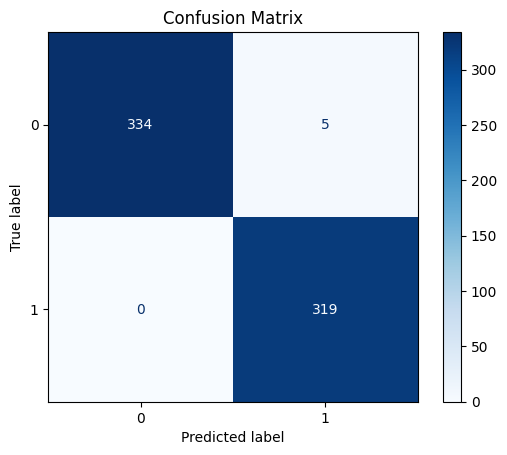

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       339
           1       0.98      1.00      0.99       319

    accuracy                           0.99       658
   macro avg       0.99      0.99      0.99       658
weighted avg       0.99      0.99      0.99       658



In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Display classification report
print("Classification Report:")
print(class_report)


21/21 [==============================] - 0s 2ms/step


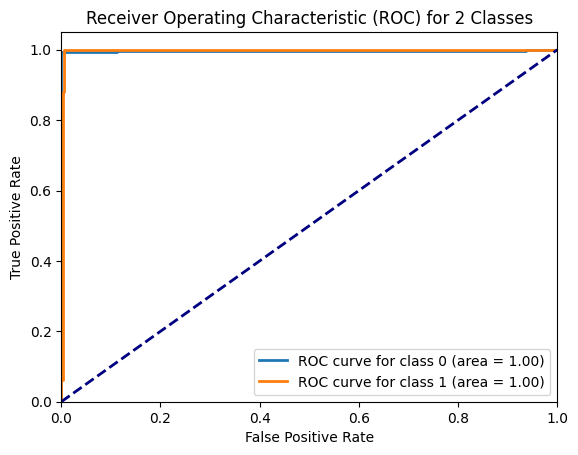

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area for each class
plt.figure()
for i in range(2):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class {} (area = {:.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for 2 Classes')
plt.legend(loc='lower right')
plt.show()


#DNN

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the DNN model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=112))
model.add(Dropout(0.5))  # Add dropout with a suitable rate
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Add dropout with a suitable rate
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Add dropout with a suitable rate
model.add(Dense(2, activation='sigmoid'))  # Assuming 8 classes
# Custom Adaptive Dropout layer
class AdaptiveDropout(tf.keras.layers.Layer):
    def __init__(self, initial_rate=0.2, **kwargs):
        super(AdaptiveDropout, self).__init__(**kwargs)
        self.initial_rate = initial_rate
        self.dropout = None

    def build(self, input_shape):
        self.dropout = tf.keras.layers.Dropout(self.initial_rate)
        super(AdaptiveDropout, self).build(input_shape)

    def call(self, inputs, training=None):
        rate = self.initial_rate if training else 0.0
        return self.dropout(inputs, training=training)

# Implement Adaptive Dropout
model.add(AdaptiveDropout(initial_rate=0.5))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/30
83/83 [==============================] - 3s 9ms/step - loss: 0.6878 - accuracy: 0.5426 - val_loss: 0.4843 - val_accuracy: 0.9149
Epoch 2/30
83/83 [==============================] - 0s 6ms/step - loss: 0.5308 - accuracy: 0.6261 - val_loss: 0.3301 - val_accuracy: 0.9438
Epoch 3/30
83/83 [==============================] - 0s 4ms/step - loss: 0.4665 - accuracy: 0.6793 - val_loss: 0.2829 - val_accuracy: 0.9711
Epoch 4/30
83/83 [==============================] - 0s 4ms/step - loss: 0.4432 - accuracy: 0.6888 - val_loss: 0.2599 - val_accuracy: 0.9726
Epoch 5/30
83/83 [==============================] - 0s 4ms/step - loss: 0.4215 - accuracy: 0.7040 - val_loss: 0.2399 - val_accuracy: 0.9772
Epoch 6/30
83/83 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.7321 - val_loss: 0.2202 - val_accuracy: 0.9848
Epoch 7/30
83/83 [==============================] - 0s 4ms/step - loss: 0.4033 - accuracy: 0.6945 - val_loss: 0.2064 - val_accuracy: 0.9833
Epoch 8/30
83/83 [==

21/21 [==============================] - 0s 1ms/step


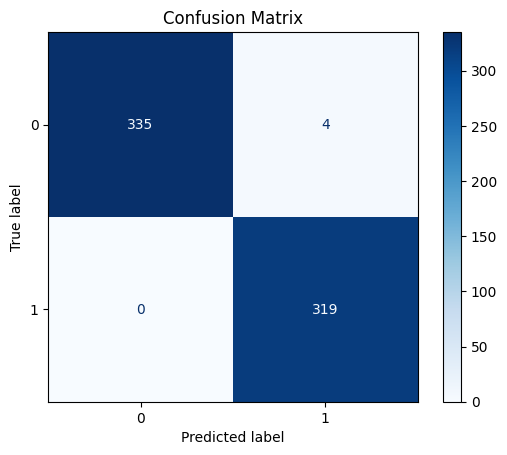

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       339
           1       0.99      1.00      0.99       319

    accuracy                           0.99       658
   macro avg       0.99      0.99      0.99       658
weighted avg       0.99      0.99      0.99       658



In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Display classification report
print("Classification Report:")
print(class_report)


21/21 [==============================] - 0s 2ms/step


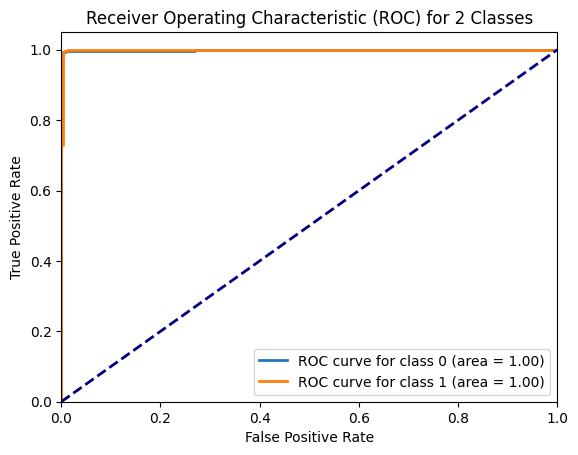

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area for each class
plt.figure()
for i in range(2):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class {} (area = {:.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for 2 Classes')
plt.legend(loc='lower right')
plt.show()


#CNN

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data for the CNN model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout with a suitable rate
model.add(Dense(2, activation='sigmoid'))
# Custom Adaptive Dropout layer
class AdaptiveDropout(tf.keras.layers.Layer):
    def __init__(self, initial_rate=0.2, **kwargs):
        super(AdaptiveDropout, self).__init__(**kwargs)
        self.initial_rate = initial_rate
        self.dropout = None

    def build(self, input_shape):
        self.dropout = tf.keras.layers.Dropout(self.initial_rate)
        super(AdaptiveDropout, self).build(input_shape)

    def call(self, inputs, training=None):
        rate = self.initial_rate if training else 0.0
        return self.dropout(inputs, training=training)

# Implement Adaptive Dropout
model.add(AdaptiveDropout(initial_rate=0.5))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/30
83/83 [==============================] - 2s 14ms/step - loss: 0.6292 - accuracy: 0.6280 - val_loss: 0.5577 - val_accuracy: 0.8921
Epoch 2/30
83/83 [==============================] - 1s 12ms/step - loss: 0.5672 - accuracy: 0.6926 - val_loss: 0.4926 - val_accuracy: 0.9286
Epoch 3/30
83/83 [==============================] - 1s 12ms/step - loss: 0.5167 - accuracy: 0.7230 - val_loss: 0.4416 - val_accuracy: 0.9422
Epoch 4/30
83/83 [==============================] - 1s 16ms/step - loss: 0.4923 - accuracy: 0.7200 - val_loss: 0.3979 - val_accuracy: 0.9544
Epoch 5/30
83/83 [==============================] - 1s 17ms/step - loss: 0.4728 - accuracy: 0.7181 - val_loss: 0.3669 - val_accuracy: 0.9620
Epoch 6/30
83/83 [==============================] - 1s 15ms/step - loss: 0.4561 - accuracy: 0.7287 - val_loss: 0.3435 - val_accuracy: 0.9620
Epoch 7/30
83/83 [==============================] - 1s 11ms/step - loss: 0.4349 - accuracy: 0.7375 - val_loss: 0.3151 - val_accuracy: 0.9666
Epoch 8/30
83

21/21 [==============================] - 0s 3ms/step


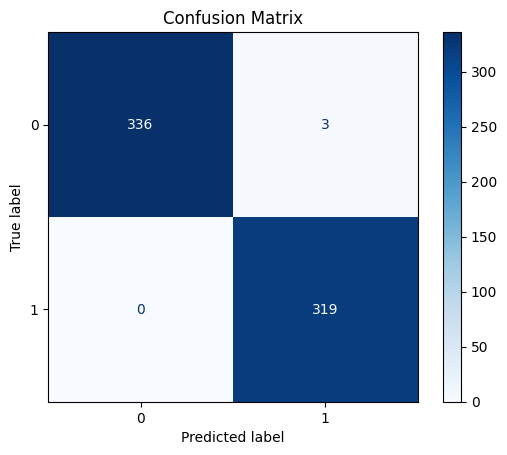

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       339
           1       0.99      1.00      1.00       319

    accuracy                           1.00       658
   macro avg       1.00      1.00      1.00       658
weighted avg       1.00      1.00      1.00       658



In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Display classification report
print("Classification Report:")
print(class_report)


21/21 [==============================] - 0s 3ms/step


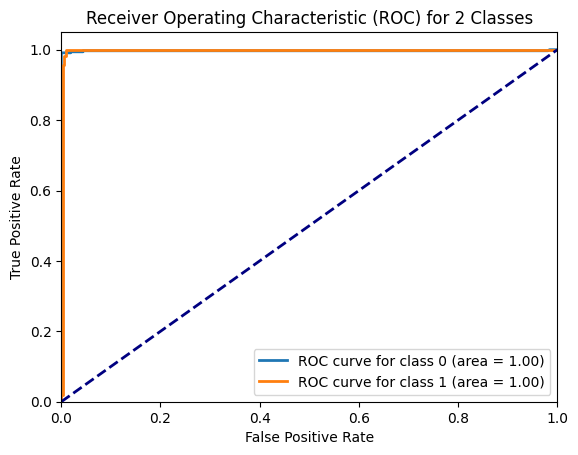

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area for each class
plt.figure()
for i in range(2):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class {} (area = {:.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for 2 Classes')
plt.legend(loc='lower right')
plt.show()


#LSTM

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Assuming you have X and y defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data for the LSTM model
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dropout(0.5))  # Add dropout with a suitable rate
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Add dropout with a suitable rate
model.add(Dense(2, activation='sigmoid'))
# Custom Adaptive Dropout layer
class AdaptiveDropout(tf.keras.layers.Layer):
    def __init__(self, initial_rate=0.2, **kwargs):
        super(AdaptiveDropout, self).__init__(**kwargs)
        self.initial_rate = initial_rate
        self.dropout = None

    def build(self, input_shape):
        self.dropout = tf.keras.layers.Dropout(self.initial_rate)
        super(AdaptiveDropout, self).build(input_shape)

    def call(self, inputs, training=None):
        rate = self.initial_rate if training else 0.0
        return self.dropout(inputs, training=training)

# Implement Adaptive Dropout
model.add(AdaptiveDropout(initial_rate=0.5))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/30
83/83 [==============================] - 3s 11ms/step - loss: 0.6866 - accuracy: 0.5300 - val_loss: 0.6353 - val_accuracy: 0.8997
Epoch 2/30
83/83 [==============================] - 0s 4ms/step - loss: 0.5948 - accuracy: 0.6744 - val_loss: 0.5058 - val_accuracy: 0.9468
Epoch 3/30
83/83 [==============================] - 0s 5ms/step - loss: 0.5154 - accuracy: 0.7173 - val_loss: 0.4253 - val_accuracy: 0.9681
Epoch 4/30
83/83 [==============================] - 0s 4ms/step - loss: 0.4634 - accuracy: 0.7371 - val_loss: 0.3717 - val_accuracy: 0.9787
Epoch 5/30
83/83 [==============================] - 0s 5ms/step - loss: 0.4523 - accuracy: 0.7230 - val_loss: 0.3376 - val_accuracy: 0.9772
Epoch 6/30
83/83 [==============================] - 1s 8ms/step - loss: 0.4258 - accuracy: 0.7371 - val_loss: 0.3065 - val_accuracy: 0.9818
Epoch 7/30
83/83 [==============================] - 1s 10ms/step - loss: 0.4086 - accuracy: 0.7443 - val_loss: 0.2797 - val_accuracy: 0.9863
Epoch 8/30
83/83 [

21/21 [==============================] - 0s 2ms/step


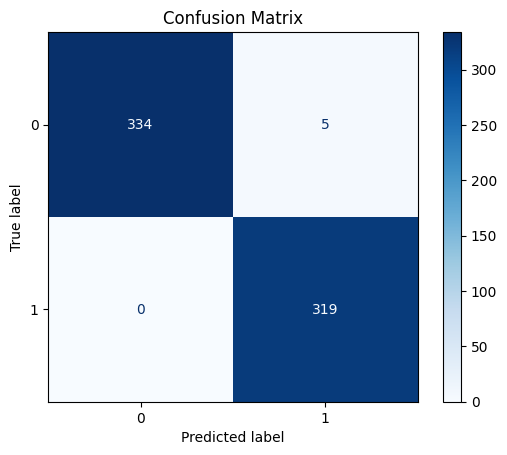

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       339
           1       0.98      1.00      0.99       319

    accuracy                           0.99       658
   macro avg       0.99      0.99      0.99       658
weighted avg       0.99      0.99      0.99       658



In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Display classification report
print("Classification Report:")
print(class_report)


21/21 [==============================] - 0s 3ms/step


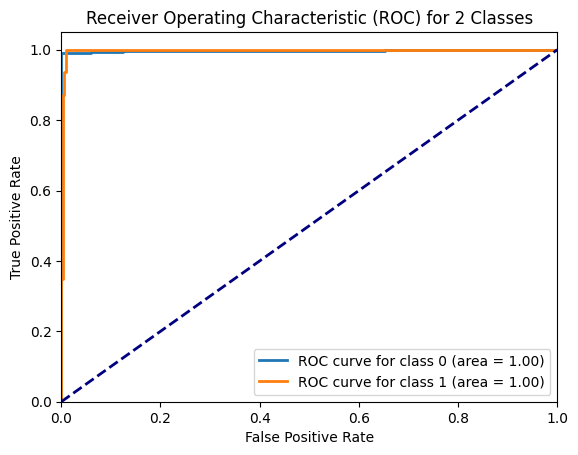

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area for each class
plt.figure()
for i in range(2):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class {} (area = {:.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for 2 Classes')
plt.legend(loc='lower right')
plt.show()
